In [4]:
#suppress warnings about class imbalances
import warnings
warnings.filterwarnings("ignore")

#install and import packages
!pip install --upgrade scikit-learn
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import models, packages
import sklearn
from sklearn import linear_model, ensemble, neural_network
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import numpy

In [5]:
#print python version for report
!python ‐‐version
import sys; print(sys.version)

python3: can't open file '/content/‐‐version': [Errno 2] No such file or directory
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [6]:
#read and display data
data = pd.read_csv("/content/winequality-red.csv", sep = ";")

In [7]:
#split into features/target
x = data.drop(columns = ['quality'])
y = data['quality']

In [13]:
#models to compare
models = [linear_model.RidgeClassifier(), ensemble.AdaBoostClassifier(), ensemble.BaggingClassifier(), ensemble.RandomForestClassifier(), linear_model.LogisticRegression(), linear_model.Perceptron(), linear_model.SGDClassifier(), neural_network.MLPClassifier(420, 'relu',)]
model_names = ["Ridge Classifier", "AdaBoost Classifier", "Bagging Classifier",
               "RandomForest Classifier", "Logistic Regression Classifier",
               "Perceptron Classifier", "SGD Classifier", "MLP Classifier"]

max_score = 0
best = None

#compare models
for i in range(len(models)):
    m = models[i]
    #10-fold cross-validation to determine best parameters
    scores = sklearn.model_selection.cross_validate(m, x, y, cv=10, scoring = "balanced_accuracy", return_estimator=True)
    best_score = list(scores["test_score"]).index(max(scores["test_score"]))
    best_estimator = scores["estimator"][best_score]
    avg_performance = np.mean(scores["test_score"])
    print(model_names[i] + "{:.4f}".format(avg_performance) + " $pm$ "  + "{:.4f}".format(np.std(scores["test_score"])))
    if avg_performance > max_score:
        best = best_estimator
        max_score = avg_performance
#print name of best model
print(max_score, best)

Ridge Classifier0.2299 $pm$ 0.0271
AdaBoost Classifier0.2649 $pm$ 0.0769
Bagging Classifier0.2582 $pm$ 0.0475
RandomForest Classifier0.2932 $pm$ 0.0394
Logistic Regression Classifier0.2370 $pm$ 0.0243
Perceptron Classifier0.2144 $pm$ 0.0573
SGD Classifier0.2531 $pm$ 0.0554
MLP Classifier0.2453 $pm$ 0.0280
0.29324839610392844 RandomForestClassifier()


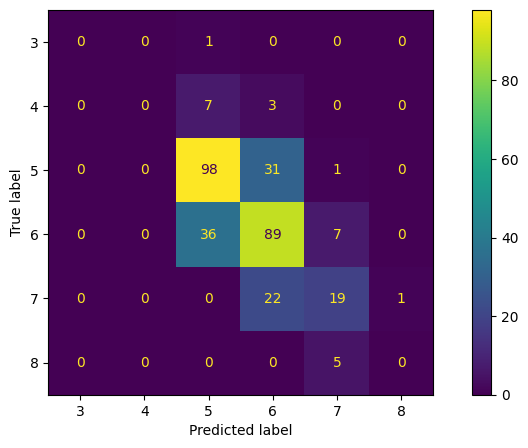

In [15]:
#plot confusion matrix to visualize true/false positives/negatives among classes
fig, ax = plt.subplots(figsize=(10, 5))
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)
fitted = best.fit(x_train, y_train)
y_pred = fitted.predict(x_test)
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)